# <font color='blue'>Chpater 5 Noise</font>

## <font color='blue'>Problem</font>

### White Noise Black Screen <br>
Here's why white noise helps us sleep: https://www.youtube.com/watch?v=hunvrwUrVHk <br>
    
Different noises: https://www.youtube.com/watch?v=nMfPqeZjc2c <br>

Adding and removing image noise in Python: https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook

Add a “salt and pepper” noise to an image with Python: https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/

### <font color='green'>Next: Digital Processing System</font>

## <font color='blue'>5-1 Basic Concept</font>
We will discuss how to generate noise <br>

#### Noise Generation：
\begin{equation}
y[n]=x[n]+\eta [n]. \tag{5.1} 
\end{equation}
where $x[n]$ is the original signal and $\eta [n]$ is Noise.

## <font color='blue'>5-2 Uniform Distributed Noise</font>

Given a random variable $x$, then a Uniform Distribution Function can be defined as：

\begin{equation}
  p(x) =
    \begin{cases}
      \frac{1}{b-a}, & \text {if}\; a \leq x \leq b\\
      0, & \text {otherwise}\; 
    \end{cases}  \tag{5.2}     
\end{equation}

“Uniform” \
means the signal contains random values from a uniform distribution; that is,  \
every value in the range is equally likely. “Uncorrelated” means that the values are independent; \
that is, knowing one value provides no information about the others.

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/250px-Uniform_Distribution_PDF_SVG.svg.png" width="200"/>
</div>
<center>Waveform of uncorrelated uniform noise.</center>

#### Expected Value
The expected value of a uniform distribution is:
\begin{equation}
E(X) = \sum_{i=1}^{n} x_i p(x_i) = \sum_{i=1}^{n} \frac{x_i}{n} = \frac{x_1+x_n}{2}. \tag{5.3}
\end{equation}

#### Variance
The variance of a uniform distribution is:
\begin{equation}
Var(X) = E(X^2) - E^2(X) = \frac{(b-a+1)^2-1}{12}. \tag{5.4}
\end{equation}

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

t = np.linspace( 0, 1, 200, endpoint = False )	# 
x = 1 * np.cos( 2 * np.pi * 5 * t )			# generate cosine signals

In [2]:
noise = 1*random.uniform( -3, 3, 200 )				# uniform distributed

In [3]:
y = x + noise

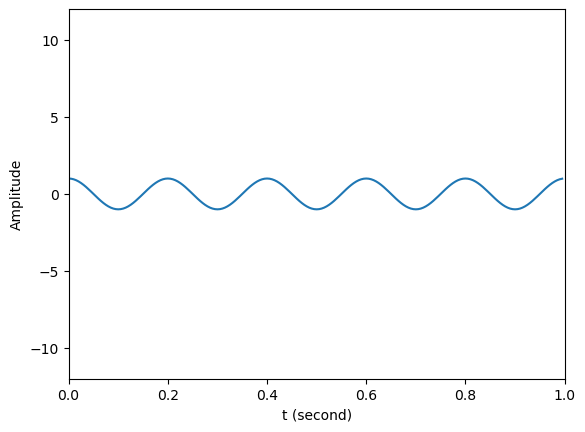

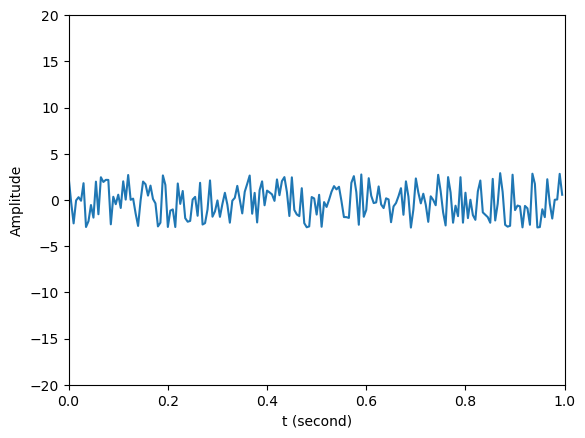

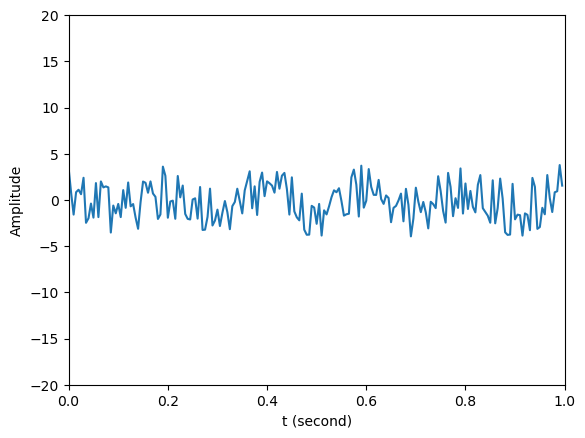

In [4]:
plt.figure( 1 )
plt.plot( t, x )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -12, 12 ] )

plt.figure( 2 )
plt.plot( t, noise )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -20, 20 ] )

plt.figure( 3 )
plt.plot( t, y )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -20, 20 ] )

plt.show( )

## <font color='blue'>5-3 Gaussian Distributed Noise</font>

Given a Random Variable $z$, the Gaussian Distribution Function is defined as：

\begin{equation}
  p(z) = \frac{1}{\sqrt {2\pi \sigma ^2}}e^{\frac{(z-\mu)^2}{2 \sigma ^2}}. \tag{5.5}
\end{equation}

where $\mu$ is Mean/Average and $\sigma$ is Standard Deviation.


<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/400px-Normal_Distribution_PDF.svg.png" width="400" alt="Centered Image"/>
</div>

Distribution: The distribution of a random signal is the set of possible values and their probabilities. <br>
For example, the values range from -1 to 1 in the uniform noise signal, and all values have the same probability. <br>
An alternative is Gaussian noise, where the set of values is the range from negative to positive infinity, <br>
However, values near 0 are the most likely, with the probability that they drop off according to the Gaussian or “bell” curve.

Correlation: Is each value in the signal independent of the others, or are there dependencies between them? <br>
In UU noise, the values are independent. <br> 

An alternative is a Brownian noise, where each value is the sum of the previous value and a random “step.” <br>
So, if the value of the signal is high at a particular point in time, we expect it to stay high. <br> 
and if it is low, we expect it to stay low.

In [5]:
noise = random.normal( 10, 3, 200 )			    	# generate nomal distributed 

## <font color='blue'>5-4 Browian distributed noise</font>

A real continue time of stochastic process $\{W_t\}_{0 \le t < \infty}$ is a Wiener process Wt characterized by four facts:

> * $W_0$ = 0, $P(W_0 = 0) =1 $
> * $W_t$ is almost surely continuous
> * $W_t$ has independent increments
> * $W_t - W_s \sim \mathcal{N}(0,\sigma^2 (t-s))$, for $0\le s \le t$

<div>
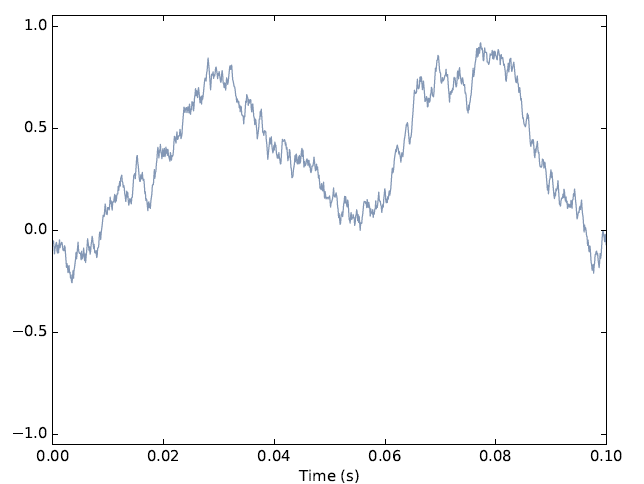
</div>
<center>Waveform of Brownian noise.</center>

<div>
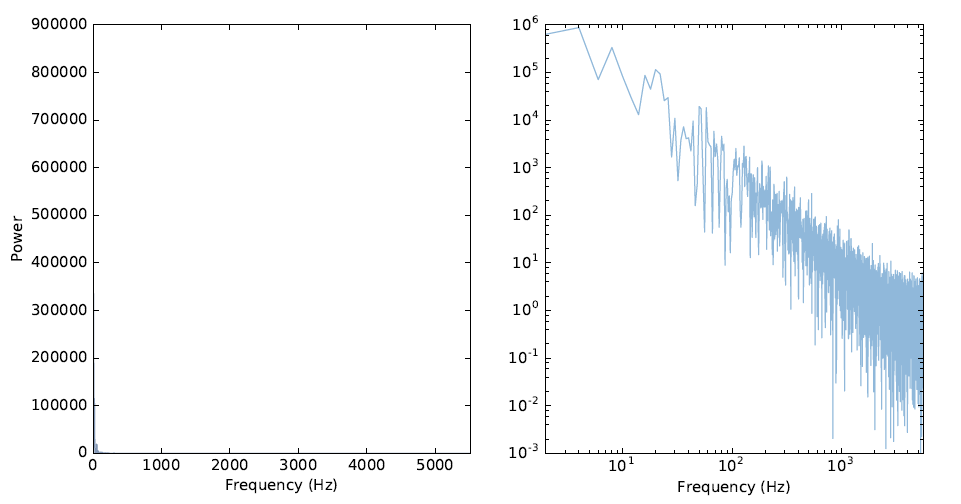
</div>
<center>Spectrum of Brownian noise on a linear scale (left) and log-log scale (right).</center>

It is called “Brownian” by analogy with Brownian motion, in which a particle suspended in a fluid moves apparently at random, due to unseen interactions
with the fluid. <br>

Brownian motion is often described using a random walk, which is a mathematical model of a path where the distance between
steps is characterized by a random distribution. <br>

In a one-dimensional random walk, the particle moves up or down by a random amount at each time step. <br>
The location of the particle at any point in time is the sum of all previous steps.

In [16]:
n1 = random.uniform( -10, 10, 200 )				# generate random 
ns = np.cumsum( n1 )
mean = np.mean( ns )	
max = np.max( np.absolute( ns - mean ) )
noise = ( ns - mean ) / max

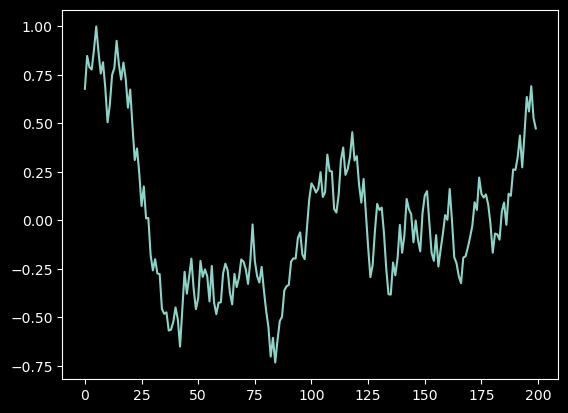

In [17]:
plt.plot(noise)

## <font color='blue'>5-5 Impule distributed noise</font>

In [8]:
amplitude = eval( input( "Enter amplitude of impulse noise: " ) )
probability = eval( input( "Enter probability of impulse noise(%): " ) )

noise = np.zeros( x.size )							# 
for i in range( x.size ):
	p1 = random.uniform( 0, 1 )
	if p1 < probability / 100:
		p2 = random.uniform( 0, 1 )
		if p2 < 0.5:
			noise[i] = amplitude
		else:
			noise[i] = -amplitude

Enter amplitude of impulse noise:  1
Enter probability of impulse noise(%):  23


原始訊號、雜訊與加入雜訊的結果。脈衝雜訊的振幅為5，因此數值為5或–5。\
此外，發生機率為5%，以200個樣本而言，共產生10個脈衝訊號(200  5% = 10)。\
由圖上可以發現，脈衝雜訊對於原始訊號的影響範圍與發生機率相關聯，5%僅造成局部的訊號失真。

### 訊號雜訊比(Signal-to-Noise Ratio)
簡稱SNR，可以定義為：

\begin{equation}
  SNR = \frac{ P_{signal} }{P_{noise}}. \tag{5.6}
\end{equation}
 
其中，$P_{signal}$為訊號功率，$P_{noise}$為雜訊功率。SNR也可以定義為：

\begin{equation}
  SNR = ({\frac{A_{signal}}{A_{noise}}})^2. \tag{5.7}
\end{equation}
 
其中，$A_{signal}$為訊號振幅，$A_{noise}$為雜訊振幅。


以分貝單位表示成：

\begin{equation}
  SNR = 10 \log_{10} ({\frac{A_{signal}}{A_{noise}}})^2 (dB). \tag{5.8}
\end{equation}

### Sin Nosie

In [9]:
import numpy as np
import wave
import struct
import numpy.random as random

file = "sinusoid(500+noise).wav"	# 

amplitude = 3000           # 
frequency = 500				# 
duration = 3				#
fs = 441000				   	# 
num_samples = duration * fs	# 
 
num_channels = 1			# 
sampwidth = 2				# 
num_frames = num_samples	# 
comptype = "NONE"		   	# 
compname = "not compressed" # 

t = np.linspace( 0, duration, num_samples, endpoint = False )
x = amplitude * np.cos( 2 * np.pi * frequency * t )	# 
noise = random.uniform( -2000, 2000, num_samples )	# 
y = x + noise

wav_file = wave.open( file, 'w' )
wav_file.setparams(( num_channels, sampwidth, fs, num_frames, comptype, compname )) 

for s in y :
   wav_file.writeframes( struct.pack( 'h', int ( s ) ) )

wav_file.close( ) 

## <font color='blue'>5-6 Pink noise</font>

#### ORGANIC PINK • Natural Pink Noises • Ocean Waves, Rain & Flowing Water
https://www.youtube.com/watch?v=zDk8pVOtiVY&t=31s

Before understanding pink noise, we need to understand white noise. White noise is a random signal that has the same intensity at different frequencies. In the human audible sound range (20 ~ 20000 Hz), it exhibits a state of smoothness, balance, and power consistency.

Why is it called white noise? Because it can contain many other kinds of noise, just like white light contains other kinds of colors, it is called white noise.

Generally white noise sounds like the rustle of a radio, the sound of a fan, the sound of a hair dryer...etc.

For red noise, the relationship between frequency and power is <br>
\begin{equation}
  P = \frac{K}{f^2}. \tag{5.9}
\end{equation}

There is nothing special about the exponent 2. We can generally synthesize noise with any exponent, $\beta$. <br>
\begin{equation}
  P = \frac{K}{f^\beta}. \tag{5.10}
\end{equation}

When $\beta$ = 0, power is constant at all frequencies, resulting in white noise.
When $\beta$ = 2, the result is red noise.
When $\beta$ is between 0 and 2, the result is white and red noises, called pink noise.
There are several ways to generate pink noise. The simplest is to create white noise and then apply a low-pass filter with the desired exponent

<div>
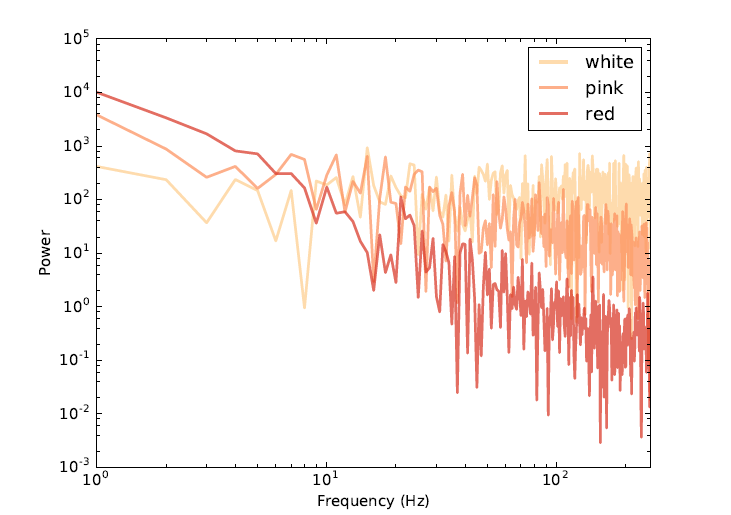
</div>
<center>Spectrum of white, pink, and red noise on a log-log scale.</center>

Why is it called pink noise?
Because the spectrogram of pink noise has strong low-frequency bands and weak high-frequency bands, it is similar to the reddish spectrum, that is, the pink spectrum, so it is called pink noise.

Why does it sound better?
The power of pink noise is stronger in the low frequency band than in the high frequency band. In other words, it is mainly distributed in the middle and low frequency bands, so pink noise will be slightly lower than white noise, and it will sound more pleasing and comfortable.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

The function PSDGenrator takes as input a function and returns another function that will produce a random signal with the power spectrum shaped accordingly to the given function.

The line S = S / np.sqrt(np.mean(S**2)) makes sure that the colored noise will preserve the energy of the white noise.

In [11]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

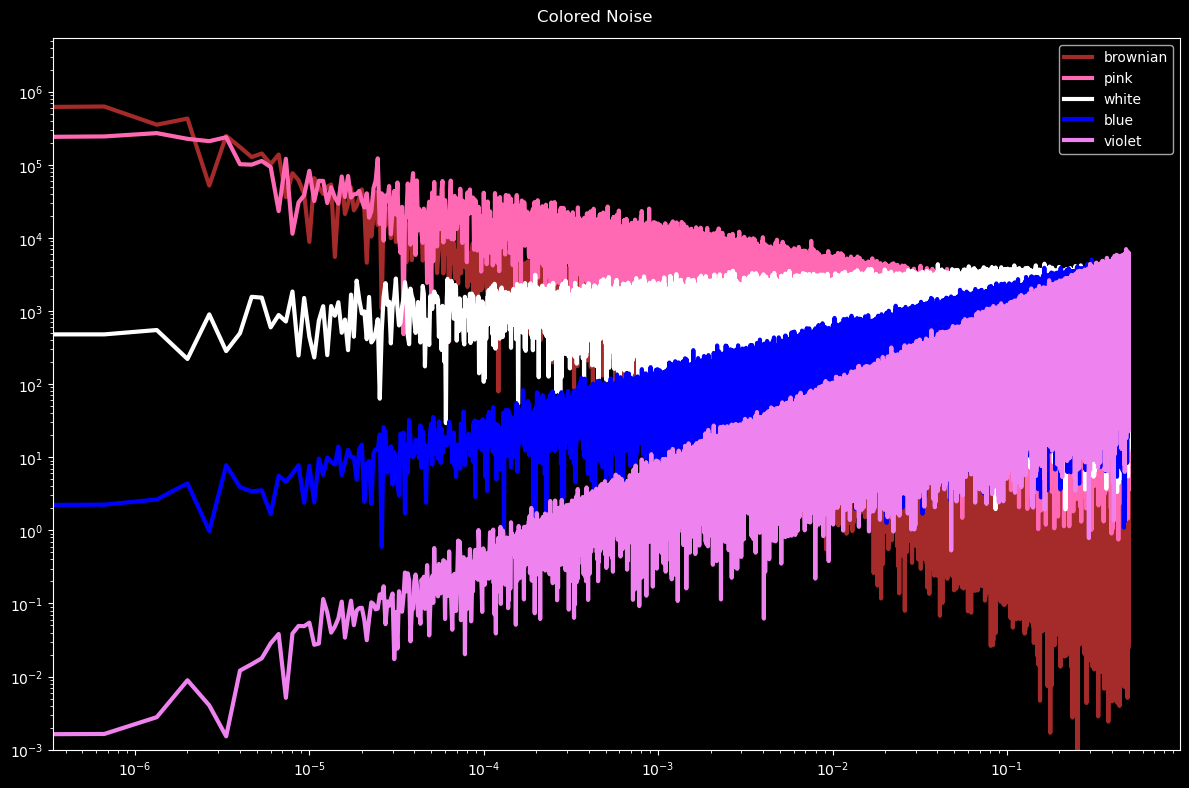

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise], 
        ['brown', 'hotpink', 'white', 'blue', 'violet']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=3)
plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])
plt.suptitle("Colored Noise");
plt.ylim([1e-3, None]);

### <font color='green'> colorednoise package </font>

### <font color='blue'> Source code for acoustics.generator </font>
http://python-acoustics.github.io/python-acoustics/_modules/acoustics/generator.html

### Application of pink noise
Calibrate the sound: How to use pink noise to correct the sound? Since the FFT (Fast Fourier Transform) spectrum displayed by pink noise and white noise is different, you can correct your audio by correcting the FFT spectrum.

(Fast Fourier Transform: Fast Fourier Transform, a mathematical method for converting time-domain waveforms into frequency-domain spectrum graphics)

## <font color='red'> Final Problem:</font>
Audio Processing Basics in Python: 
https://www.it-jim.com/blog/audio-processing-basics-in-python/

[Ref] Deep ANC- A deep learning approach to active noise control